In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(0)
%matplotlib inline

In [3]:
weights = np.zeros(3)
alpha = 1

## Create a bunch of random points. x1, y1, referring to negative examples and x2, y2 to positive and plot it.

In [43]:
x1 = np.random.uniform(0, 2, size=100)
y1 = np.random.uniform(0, 5, size=100)
x2 = np.random.uniform(3, 5, size=100)
y2 = np.random.uniform(0, 5, size=100)

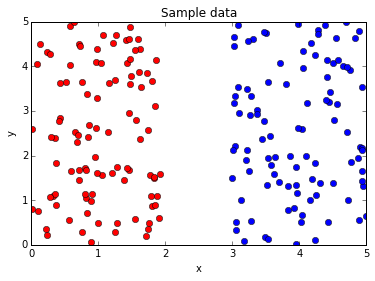

In [44]:
plt.plot(x1, y1, 'ro', x2, y2, 'bo')
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.title('Sample data')

## Prepare the data: X matrix for features and y for output labels.

In [54]:
X = np.array(np.concatenate((np.column_stack((x1, y1)), np.column_stack((x2, y2))), axis=0))
nrows, ncols = X.shape
X = np.insert(X, 0, np.ones(nrows), axis=1)
y = np.concatenate((np.ones(100) * -1, np.ones(100)))

In [46]:
class Perceptron(object):
    def __init__(self, alpha=0.01, n_iter=10):
        self.alpha = alpha
        self.n_iter = n_iter
    
    def fit(self, X, y):
        nrows, ncols = X.shape
        # initialize weights according to the # of columns
        self.weights = np.zeros(ncols)
        for _ in range(self.n_iter):
            for xi, target in zip(X, y):
                y_predicted = self.predict(xi)
                delta_wj = self.alpha * (target - y_predicted)
                self.weights += delta_wj * xi
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)
    
    def net_input(self, X):
        return np.dot(X, self.weights)

In [55]:
p = Perceptron(n_iter=100)
p.fit(X, y)

In [57]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 'o', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 1].min(), X[:, 1].max()
    x2_min, x2_max = X[:, 2].min(), X[:, 2].max()
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    # append column of 1s for convenience
    matrix = np.array([np.ones(xx1.ravel().shape[0]), xx1.ravel(), xx2.ravel()]).T
    Z = classifier.predict(matrix)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 1], y=X[y == cl, 2],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

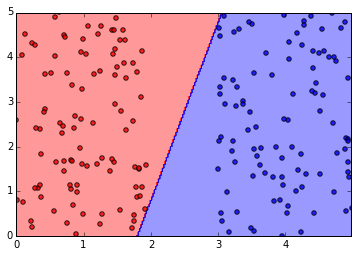

In [58]:
plot_decision_regions(X, y, p)